# Neural Networks for Data Science Applications
## End-of-term homework: Advanced transfer learning

**Name**: *Erica Luciani*

**Matricola**: *1868647*

> ✍ Upload the completed notebook **at least two days** before your expected exam's date on the Google Classroom page. For example, for the **January 12th** session, you should upload it by **January 9th, 23:59 Rome time**.

In [ ]:
!pip install datasets
!pip install transformers==4.39.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [ ]:
import os
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from zipfile import ZipFile
import matplotlib.pyplot as plt
from datasets import load_dataset
from google.colab import drive, files
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertConfig, BertTokenizer

In [ ]:
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
# To ensure reproducible results (as much as possible)
tf.keras.utils.set_random_seed(1234)

In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Instructions

1. The homework is divided into two exercises. The first one (**10 points**) is mandatory for everyone. The second one (**5 points**) is mandatory only if you have not submitted the first homework or if you want to increase the mark.
2. If you score well on the project but poorly on the oral, the grade can be kept for the entire academic year (up to October 2024).

**IMPORTANT - read carefully before starting**:

> 🟨 *External material*: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*. <ins>Not following these two points is an immediate 0 mark</ins>.

> 🔵 *Grammar*: for the textual descriptions, I will remove points for too many grammatical or textual errors. Please try to be precise and provide nice-to-read descriptions, like if you were writing a report.

> 🟥 *Vectorization and TensorFlow*: the homework must be done _fully in TensorFlow_ and vectorizing the code as much as possible (e.g., do not loop explicitly over the batch dimension).

> 🟪 *Math*: you can also use LaTeX in Markdown if you need to write equations or if you need generic math notation.

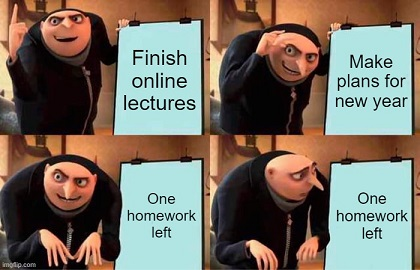

## Warmup: Data loading

**For this part, select an interesting dataset.**

*   This is similar to [Exercise 1 from the mid-term homework](https://colab.research.google.com/drive/1oDbshJeY62Id1O5pbsCrNFX9PdSY1ITP?usp=sharing), which you can check for completeness.
*   You should use a **different dataset** from the first homework, possibly of higher complexity.
*   Any data type (tabular, images, videos, audio, time-series, graphs, ...) is okay.

✍ **DESCRIPTION OF THE CODE**

*Provide a SHORT description of the dataset below (e.g., source, task, bibliographic reference if necessary...), both as text and in the comments of the code.*

**TODO**: add description here (1-2 paragraphs).

For this project, which aims to try to reproduce the technique presented in the paper *‘Editing models with task vectors’*, we will need two datasets. In the following section, I will explain more fully how they will be used.

The first dataset I have chosen to use is the **Twitter Sentiment Analysis** dataset uploaded by the user carblacac on Hugging Face, which can be found at the following link https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis.  
At the time of downloading, the dataset is already divided into train set, test set and val set, each of which has two columns: in the ‘text’ column we find the corpus of the tweets, while in the ‘feeling’ column we find the boolean values 0 (negative) and 1 (positive), which indicate the sentiment expressed in the tweet. As reported in the cited link, the initial sets have the following dimensions:
$$
\small
\begin{array}{|l|c|c|c|}
\hline
\text{Data} & \text{Train} & \text{Validation} & \text{Test} \\
\hline
\text{Size} & 119988 & 29997 & 61998 \\
\text{Labeled positive} & 60019 & 14947 & 31029 \\
\text{Labeled negative} & 59969 & 15050 & 30969 \\
\hline
\end{array}
$$

The second dataset, **Amazon Reviews**, was taken from Kaggle at the link https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews and was originally divided into train set and test set only. As we shall see, I modified both the structure and the size of the dataset: however, both sets originally contained three columns -one for the sentiment of the review (1 for negative and 2 for positive), one for the title and another for the text of the review- and these were their sizes:

$$
\small
\begin{array}{|l|c|c|}
\hline
\text{Data} & \text{Train} &  \text{Test} \\
\hline
\text{Size} & 3.599.999 & 399.999 \\
\text{Labeled positive} & 1799999 & 199999 \\
\text{Labeled negative} & 1800000 & 200000\\
\hline
\end{array}
$$

From these two datasets, we will derive a third dataset, that I will refer to as *Mixed*, containing elements from both datasets, the use of which I will explain later.

First of all, let's download the two datasets. Then, I'm going to separately clean and process the two of them.

In [ ]:
# TODO: Insert all code here.

# Downloading Twitter Sentiment Analysis dataset from Hugging face
dataset_id = 'carblacac/twitter-sentiment-analysis'
dataset = load_dataset(dataset_id)
dataset.save_to_disk(f'/content/drive/MyDrive/NN/Data')

# Downloading Amazon Reviews dataset from Kaggle
uploaded = files.upload()
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d kritanjalijain/amazon-reviews -p /content/drive/MyDrive/NN/Data
!chmod 600 /content/kaggle.json

with ZipFile('/content/drive/MyDrive/NN/Data/amazon-reviews.zip', 'r') as zipObj:
   zipObj.extractall()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the ne

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/149985 [00:00<?, ? examples/s]

Map:   0%|          | 0/61998 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/120 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/62 [00:00<?, ?ba/s]

Generating train split:   0%|          | 0/119988 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/61998 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/119988 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/29997 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/61998 [00:00<?, ? examples/s]

**Twitter Data Processing**

In [ ]:
# Convert train, val and test sets into pandas DataFrame
twitter_train = pd.DataFrame(dataset['train'])
twitter_val = pd.DataFrame(dataset['validation'])
twitter_test = pd.DataFrame(dataset['test'])

The following preprocessing steps were done in preparation for training a pre-trained model on sentiment analysis, which will be next section's focus. By cleaning and standardizing the text data, I would like to ensure that the model receives a suitable input, hoping it can lead to better performance during training and evaluation.







In [ ]:
def text_preprocessing(text):
    '''
    This function preprocesses a given text string to make it more suitable for machine learning tasks
    '''
    # Remove uppercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove twitter mentions (e.g. @user)
    text = re.sub(r'@\w+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

twitter_train['text'] = [text_preprocessing(text) for text in twitter_train['text']]
twitter_val['text'] = [text_preprocessing(text) for text in twitter_val['text']]
twitter_test['text'] = [text_preprocessing(text) for text in twitter_test['text']]

Due to the limitation in the use of Google Colab's gpu, I decided to considerably reduce the size of the datasets. In particular, I reduced the train set to 7500 elements, out of which 2500 will be destined for the mixed dataset. I will reduce and split validation and train set according to the same proportions.

In [ ]:
def reduce_and_split(df, frac, split_p):
  '''
    This function performs two tasks on the input dataframe: reduction and splitting.
    It first reduces the dataframe by randomly sampling a fraction of its rows.
    Then, it splits this reduced DataFrame into two separate DataFrames.
  '''
  # Reduce the dimension of the dataframe according to a certain percentage (frac)
  df = df.sample(frac = frac, replace=False, random_state=42)
  # Split the remaining portion of the dataframe to keep some elements for the mixed dataframe
  df, mixed_df = train_test_split(df, test_size=split_p, random_state=42)
  # Reset the indices
  df.reset_index(drop = True, inplace = True)
  mixed_df.reset_index(drop = True, inplace = True)
  return df, mixed_df

# Compute the reduction percentage basing on the desired number of training samples over the total
frac = 7500/len(twitter_train)
# Compute the proportion of the sampled dataset to be included in the mixed dataset
split_p = 2500/7500

twitter_train, mixed_train_t = reduce_and_split(twitter_train, frac, split_p)
twitter_val, mixed_val_t = reduce_and_split(twitter_val, frac, split_p)
twitter_test, mixed_test_t = reduce_and_split(twitter_test, frac, split_p)

**Amazon Data Cleaning**

Now I will repeat almost the same steps on the Amazon Reviews dataset, adding some extra cleaning.

In [ ]:
amazon_train = pd.read_csv('/content/drive/MyDrive/NN/Data/train.csv')
amazon_test = pd.read_csv('/content/drive/MyDrive/NN/Data/test.csv')

To begin with, I considered it appropriate to homologate the structure of this dataset to that of Twitter, also and especially in view of the creation of the mixed dataset. Therefore, I collapsed the title column into the text column, so as not to lose potential important information on the sentiment of the review and also to have two columns instead of three. In addition, it was necessary to remove some rows where NaN values were present and to scale the target values to match those of the Twitter dataset.

In [ ]:
def amazon_df_processing(df):
  """
  This function aligns the structure of the Amazon dataset with that of the Twitter dataset.
  """
  # Rename the columns to match twitter dataset's columns
  df.columns = ['feeling', 'title', 'text']
  # Combine 'title' and 'text' into a single 'text' column
  df['text'] = df['title'] + ' ' + df['text']
  # Drop the 'title' column
  df = df.drop(columns=['title'])
  # Swipe columns order to match twitter's dataset order
  df = df.reindex(columns=['text','feeling'])
  # Dropping nan rows
  df = df.dropna(subset=['text'])
  # Map the 'feeling' column to match twitter's labels: 1 -> 0 (negative), 2 -> 1 (positive)
  df['feeling'] = df['feeling'].map({1: 0, 2: 1})
  return df

amazon_train = amazon_df_processing(amazon_train)
amazon_test = amazon_df_processing(amazon_test)

Once I got the dataset cleaned, I called the function *text_preprocessing* and then I drew the validation set from the train set.

In [ ]:
amazon_train['text'] = [text_preprocessing(text) for text in amazon_train['text']]
amazon_test['text'] = [text_preprocessing(text) for text in amazon_test['text']]

In [ ]:
# Splitting the train set to get the validation set
amazon_train, amazon_val = train_test_split(amazon_train, test_size=0.5, random_state=42)

Again, due to computational reasons it was indeed necessary to reduce the inital size of the dataset (which, by the way, was huge compared to the size of the first dataset). For the sake of simplicity, I made sure to match the size of the two datasets and set aside the same portion of elements for the mixed dataset. In the end, the mixed dataset will have approximately the same dimension as the two datasets from which it was created.

In [ ]:
amazon_train, mixed_train_a = reduce_and_split(amazon_train, ((len(twitter_train)+len(mixed_train_t)) / len(amazon_train)), split_p)
amazon_val, mixed_val_a = reduce_and_split(amazon_val, ((len(twitter_val)+len(mixed_val_t)) / len(amazon_val)), split_p)
amazon_test, mixed_test_a = reduce_and_split(amazon_test, ((len(twitter_test)+len(mixed_test_t)) / len(amazon_test)), split_p)

**Mixed Dataset Creation**

All that remains now is to merge the data we have extracted from the Amazon and Twitter datasets into a single DataFrame, which will already be cleaned and preprocessed by construction.

In [ ]:
def concatenate_mixed_df(df1, df2):
  # Concatenate df1 and df2 along the rows and shuffle the rows of the concatenated DataFrame
  df = pd.concat([df1, df2], ignore_index=True).sample(frac=1,  random_state=42)
  # Reset indices
  df.reset_index(drop=True, inplace = True)
  return df

mixed_train = concatenate_mixed_df(mixed_train_t, mixed_train_a)
mixed_val = concatenate_mixed_df(mixed_val_t, mixed_val_a)
mixed_test = concatenate_mixed_df(mixed_test_t, mixed_test_a)

Let's plot the target distributions to check that the classes are still balanced.

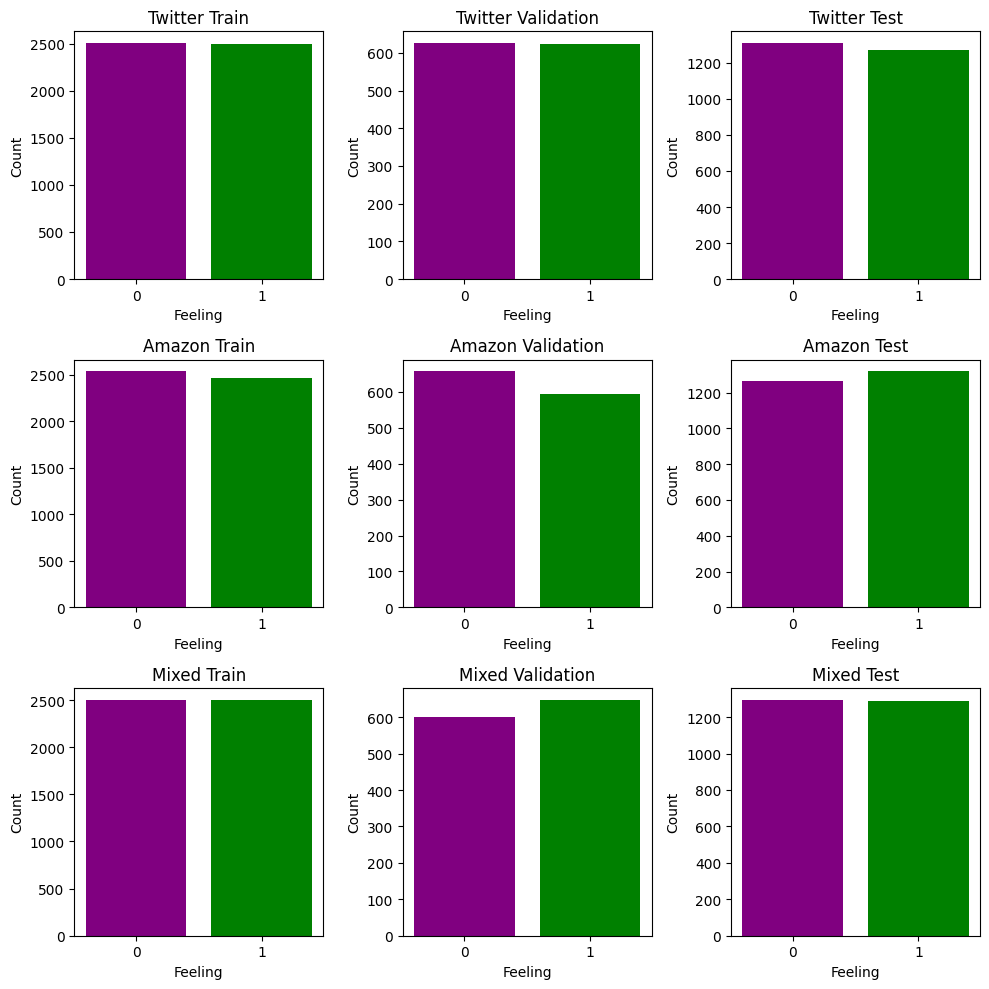

In [ ]:
datasets = [twitter_train, twitter_val, twitter_test,
            amazon_train, amazon_val, amazon_test,
            mixed_train, mixed_val, mixed_test]
titles = ['Twitter Train', 'Twitter Validation', 'Twitter Test',
          'Amazon Train', 'Amazon Validation', 'Amazon Test',
          'Mixed Train', 'Mixed Validation', 'Mixed Test']

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, data in enumerate(datasets):
    value_counts = data['feeling'].value_counts().sort_index()
    axes[i//3, i%3].bar(value_counts.index, value_counts.values, color=['purple', 'green'])
    axes[i//3, i%3].set_title(titles[i])
    axes[i//3, i%3].set_xlabel('Feeling')
    axes[i//3, i%3].set_ylabel('Count')
    axes[i//3, i%3].set_xticks(value_counts.index)
    axes[i//3, i%3].set_xticklabels(value_counts.index, rotation=0)

plt.tight_layout()
plt.show()


Classes are quite well-balanced, so we can move on to the core of this project!

### Exercise 1: Advanced transfer learning (10 points)

For this exercise, you are asked to implement some form of "advanced" transfer learning method. These include, but are not limited to, the content of Lecture 10 in the course, e.g.:

1.   **Parameter-efficient fine-tuning** (PEFT) methods (LoRA, adapters, soft prompting, ...).
2.   **Task vectors** and arithmetic in the weight space.
3.   **Model merging** and model combination (e.g., relative representations).

The following are useful surveys and papers you can take inspiration from. If you are in doubt, ask me before starting.

1. [Scaling Down to Scale Up: A Guide to Parameter-Efficient Fine-Tuning](https://arxiv.org/abs/2303.15647) - A survey on PEFT models.
2. [Modular Deep Learning](https://arxiv.org/abs/2302.11529) - A tutorial on the emerging paradigm of modular deep learning, in which networks are composed of modular building blocks. This is connected to PEFT, see in particular Section 7.
3. Examples of model merging: [model ratatouille](https://arxiv.org/abs/2212.10445), [git re-basin](https://arxiv.org/abs/2209.04836), [Fisher averaging](https://arxiv.org/abs/2111.09832).
4. Examples of task arithmetic: [simple arithmetic](https://arxiv.org/abs/2212.04089), [tangent space](https://arxiv.org/abs/2305.12827).

For this exercise, you can either transfer from two models that you trained autonomously (e.g., train one model on another dataset, add an adapter, fine-tune on the dataset you selected before), or fine-tune directly from a pre-trained model found on the web. For finding pre-trained models, you can check [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications), [TensorFlow model garden](https://www.tensorflow.org/guide/model_garden?hl=it), or the [Hugging Face Hub](https://huggingface.co/docs/hub/index).

> 🟥 Remember that the homework must be done fully in TensorFlow, with no external libraries (when in doubt, ask).

✍ **DESCRIPTION OF THE CODE**

*Provide a description of what you are implementing, both as text and in the comments of the code.*

**TODO**: add description here (1-2 paragraphs).

The ‘advanced’ transfer learning method I have chosen to try and implement is that of task vectors and arithmetic in the space of weights. In particular, I found it interesting to try the method of ‘learning via addition’, which is discussed in the paper ‘Editing models with task arithmetic’ by Gabriel Ilharco et al. Quoting the paper itself, ‘‘adding task vectors results in better multi-task models, or improved performance on a single task’’, hence why I chose to select two datasets for sentiment analysis.

<center>
  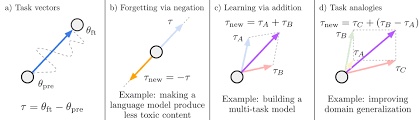
</center>

The basic idea is quite simple: what I am going to do is to fine-tune Bert on both datasets separately, then derive the task vectors from the two fine-tunings and finally have a third fine-tuning done on the mixed dataset, this time training only Bert's classifier part and using as weights the sum of the weights of the pretrained model and the task vectors.

In [ ]:
# TODO: Your code here.

In [ ]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

#### **Fine-Tuning BERT on Twitter Dataset**

Before performing the actual fine-tuning, I need to apply the tokenizer to the 'text' columns, convert the target labels into TensorFlow tensors and create Tensorflow datasets for training, validation and test data from tensor slices of input IDs and attention masks.

In [ ]:
# Tokenize the 'text' column of the dataframes, the text will have maximum length of 250 tokens and padding is applied to ensure all inputs are of the same length.
twitter_train_X = tokenizer(twitter_train['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)
twitter_val_X = tokenizer(twitter_val['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)
twitter_test_X = tokenizer(twitter_test['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)

# Convert 'feeling' columns to Tensorflow tensors
twitter_train_y  = tf.convert_to_tensor(twitter_train['feeling'].tolist())
twitter_val_y  = tf.convert_to_tensor(twitter_val['feeling'].tolist())
twitter_test_y  = tf.convert_to_tensor(twitter_test['feeling'].tolist())

# Create Tensorflow datasets
twitter_train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': twitter_train_X['input_ids'], 'attention_mask': twitter_train_X['attention_mask']}, twitter_train_y)).shuffle(5000).batch(16)
twitter_val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': twitter_val_X['input_ids'], 'attention_mask': twitter_val_X['attention_mask']}, twitter_val_y)).batch(16)
twitter_test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': twitter_test_X['input_ids'], 'attention_mask': twitter_test_X['attention_mask']},twitter_test_y)).batch(16)

Finally we download the pretrained Bert model and train it.

In [ ]:
# Import Bert and take a look at the number of parameters
twitter_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels = 2)
twitter_model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile Twitter model
twitter_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001),
                      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [ ]:
# Train Twitter model
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= '/content/drive/MyDrive/NN/twitter_model_best_weights.h5', save_weights_only=True, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

twitter_fit = twitter_model.fit(twitter_train_dataset, validation_data=twitter_val_dataset, epochs=10, callbacks = [checkpoint_callback, early_stopping_callback])

Epoch 1/10


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 393s 953ms/step - loss: 0.5584 - accuracy: 0.7042 - val_loss: 0.4375 - val_accuracy: 0.7992
Epoch 2/10
313/313 [==============================] - 281s 899ms/step - loss: 0.3786 - accuracy: 0.8410 - val_loss: 0.4222 - val_accuracy: 0.8176
Epoch 3/10
313/313 [==============================] - 275s 880ms/step - loss: 0.2446 - accuracy: 0.9100 - val_loss: 0.5070 - val_accuracy: 0.8080
Epoch 4/10
313/313 [==============================] - 275s 879ms/step - loss: 0.1438 - accuracy: 0.9502 - val_loss: 0.6409 - val_accuracy: 0.7832
Epoch 5/10
313/313 [==============================] - 275s 878ms/step - loss: 0.0819 - accuracy: 0.9754 - val_loss: 0.6629 - val_accuracy: 0.8056


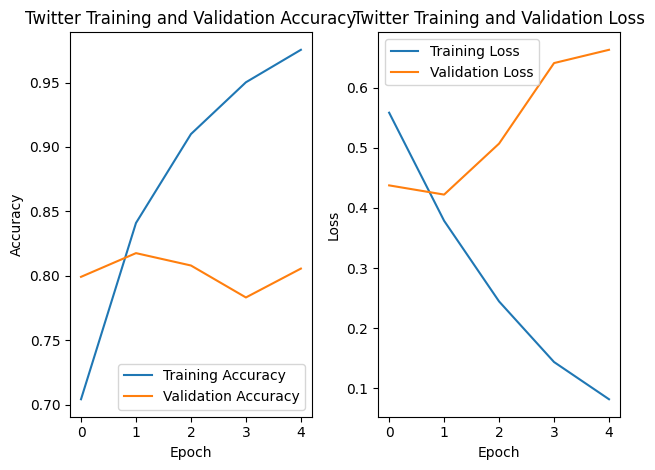

In [ ]:
# Plot accuracy and loss during the epochs

twitter_train_accuracy = twitter_fit.history['accuracy']
twitter_val_accuracy = twitter_fit.history['val_accuracy']
twitter_train_loss = twitter_fit.history['loss']
twitter_val_loss = twitter_fit.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(twitter_train_accuracy, label='Training Accuracy')
plt.plot(twitter_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Twitter Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(twitter_train_loss, label='Training Loss')
plt.plot(twitter_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Twitter Training and Validation Loss')
plt.tight_layout()
plt.show()

In [ ]:
# Load best model weights stored during training
twitter_model.load_weights('/content/drive/MyDrive/NN/twitter_model_best_weights.h5')

In [ ]:
# Test the model
twitter_model.evaluate(twitter_test_dataset)

162/162 [==============================] - 47s 291ms/step - loss: 0.4624 - accuracy: 0.7960


[0.4623873233795166, 0.7959736585617065]

#### **Fine-Tuning BERT on Amazon Dataset**


All I did in the previous section was replicated here switching to the other dataset.

In [ ]:
# Tokenize the 'text' column of the dataframes, the text will have maximum length of 250 tokens and padding is applied to ensure all inputs are of the same length.
amazon_train_X = tokenizer(amazon_train['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)
amazon_val_X = tokenizer(amazon_val['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)
amazon_test_X = tokenizer(amazon_test['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)

# Convert'feeling' columns to Tensorflow tensors
amazon_train_y  = tf.convert_to_tensor(amazon_train['feeling'].tolist())
amazon_val_y  = tf.convert_to_tensor(amazon_val['feeling'].tolist())
amazon_test_y  = tf.convert_to_tensor(amazon_test['feeling'].tolist())

# Create Tensorflow datasets
amazon_train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': amazon_train_X['input_ids'], 'attention_mask': amazon_train_X['attention_mask']}, amazon_train_y)).shuffle(5000).batch(16)
amazon_val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': amazon_val_X['input_ids'], 'attention_mask': amazon_val_X['attention_mask']}, amazon_val_y)).batch(16)
amazon_test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': amazon_test_X['input_ids'], 'attention_mask': amazon_test_X['attention_mask']}, amazon_test_y)).batch(16)

In [ ]:
# Import Bert
amazon_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels = 2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile Amazon model
amazon_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001),
                     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

In [ ]:
# Train Amazon model
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/drive/MyDrive/NN/amazon_model_best_weights.h5', save_weights_only=True, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor ='val_loss', patience=3)

amazon_fit = amazon_model.fit(amazon_train_dataset, validation_data=amazon_val_dataset, epochs=10, callbacks = [checkpoint_callback, early_stopping_callback])

Epoch 1/10
313/313 [==============================] - 384s 1s/step - loss: 0.3180 - accuracy: 0.8680 - val_loss: 0.2225 - val_accuracy: 0.9176
Epoch 2/10
313/313 [==============================] - 288s 922ms/step - loss: 0.1451 - accuracy: 0.9512 - val_loss: 0.2028 - val_accuracy: 0.9304
Epoch 3/10
313/313 [==============================] - 279s 893ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.2763 - val_accuracy: 0.9256
Epoch 4/10
313/313 [==============================] - 280s 895ms/step - loss: 0.0535 - accuracy: 0.9856 - val_loss: 0.2522 - val_accuracy: 0.9328
Epoch 5/10
313/313 [==============================] - 279s 893ms/step - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.3328 - val_accuracy: 0.9152


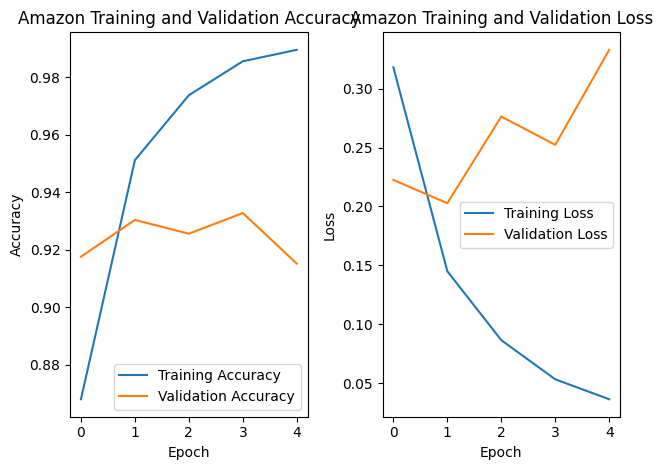

In [ ]:
# Plot accuracy and loss during the epochs

amazon_train_accuracy = amazon_fit.history['accuracy']
amazon_val_accuracy = amazon_fit.history['val_accuracy']
amazon_train_loss = amazon_fit.history['loss']
amazon_val_loss = amazon_fit.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(amazon_train_accuracy, label='Training Accuracy')
plt.plot(amazon_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Amazon Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(amazon_train_loss, label='Training Loss')
plt.plot(amazon_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Amazon Training and Validation Loss')
plt.tight_layout()
plt.show()

In [ ]:
# Load best model weights stored during training
amazon_model.load_weights('/content/drive/MyDrive/NN/amazon_model_best_weights.h5')

In [ ]:
# Test the model
amazon_model.evaluate(amazon_test_dataset)

162/162 [==============================] - 48s 294ms/step - loss: 0.1840 - accuracy: 0.9365


[0.18398405611515045, 0.9365079402923584]

#### **Task vectors**

In order to compute task vector, I first need to retrieve the pretrained weights of Bert $\theta_{pre}$, then task vector will be obtained as the difference of the weights after fine-tuning on the task $\theta_{ft}$ and the pretrained weights: $\tau=\theta_{ft}-\theta_{pre}$. Task vectors are applied to any model parameters $\theta$ from the same architecture, via element-wise
addition, so that, in our case, $\theta_{new} = \theta_{pre}+\tau_{twitter}+\tau_{amazon}$.

In [ ]:
bert = TFBertForSequenceClassification.from_pretrained(model_name, num_labels = 2)
# Get pretrained weights
pretrained_weights = bert.bert.get_weights()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Computing the two task vectors
twitter_tau = [twitter_model.bert.get_weights()[i] - pretrained_weights[i] for i in range(len(pretrained_weights))]
amazon_tau = [amazon_model.bert.get_weights()[i] - pretrained_weights[i] for i in range(len(pretrained_weights))]

# Updating pretrained weights adding task vectors
mixed_weights = [pretrained_weights[i] + twitter_tau[i] + amazon_tau[i] for i in range(len(pretrained_weights))]

In [ ]:
# with open('/content/drive/MyDrive/NN/mixed_weights.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(mixed_weights)

#### **Fine-Tuning BERT's classifier on Mixed Dataset**

In [ ]:
# Tokenize the 'text' column of the dataframes, the text will have maximum length of 250 tokens and padding is applied to ensure all inputs are of the same length.
mixed_train_X = tokenizer(mixed_train['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)
mixed_val_X = tokenizer(mixed_val['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)
mixed_test_X = tokenizer(mixed_test['text'].tolist(), return_tensors="tf", truncation=True, padding='max_length', max_length=250)

# Convert 'feeling' columns to Tensorflow tensors
mixed_train_y  = tf.convert_to_tensor(mixed_train['feeling'].tolist())
mixed_val_y  = tf.convert_to_tensor(mixed_val['feeling'].tolist())
mixed_test_y  = tf.convert_to_tensor(mixed_test['feeling'].tolist())

# Create Tensorflow datasets
mixed_train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': mixed_train_X['input_ids'], 'attention_mask': mixed_train_X['attention_mask']}, mixed_train_y)).shuffle(5000).batch(16)
mixed_val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': mixed_val_X['input_ids'], 'attention_mask': mixed_val_X['attention_mask']}, mixed_val_y)).batch(16)
mixed_test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': mixed_test_X['input_ids'], 'attention_mask': mixed_test_X['attention_mask']},mixed_test_y)).batch(16)

In [ ]:
# Import Bert
mixed_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels = 2)

# Set the new weights obtained via adding task vectors
mixed_model.bert.set_weights(mixed_weights)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Freeze Bert's encoder
mixed_model.bert.trainable = False
mixed_model.summary()

Model: "tf_bert_for_sequence_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_151 (Dropout)       multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 1538 (6.01 KB)
Non-trainable params: 109482240 (417.64 MB)
_________________________________________________________________


In [ ]:
# Compile mixed model
mixed_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [ ]:
# Train Bert's classifier
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/NN/mixed_model_best_weights.h5', save_weights_only=True, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
mixed_fit = mixed_model.fit(mixed_train_dataset, validation_data=mixed_val_dataset, epochs=10, callbacks = [checkpoint_callback, early_stopping_callback])

Epoch 1/10
313/313 [==============================] - 188s 473ms/step - loss: 0.3907 - accuracy: 0.8442 - val_loss: 0.3643 - val_accuracy: 0.8560
Epoch 2/10
313/313 [==============================] - 127s 407ms/step - loss: 0.3795 - accuracy: 0.8452 - val_loss: 0.3593 - val_accuracy: 0.8560
Epoch 3/10
313/313 [==============================] - 137s 437ms/step - loss: 0.3739 - accuracy: 0.8470 - val_loss: 0.3528 - val_accuracy: 0.8584
Epoch 4/10
313/313 [==============================] - 143s 457ms/step - loss: 0.3685 - accuracy: 0.8460 - val_loss: 0.3519 - val_accuracy: 0.8536
Epoch 5/10
313/313 [==============================] - 166s 530ms/step - loss: 0.3661 - accuracy: 0.8442 - val_loss: 0.3513 - val_accuracy: 0.8600
Epoch 6/10
313/313 [==============================] - 148s 472ms/step - loss: 0.3610 - accuracy: 0.8504 - val_loss: 0.3489 - val_accuracy: 0.8576
Epoch 7/10
313/313 [==============================] - 147s 471ms/step - loss: 0.3577 - accuracy: 0.8476 - val_loss: 0.3478 -

In [ ]:
# Load best model weights
mixed_model.load_weights('/content/drive/MyDrive/NN/mixed_model_best_weights.h5')

In [ ]:
# Test the model
mixed_model.evaluate(mixed_test_dataset)

162/162 [==============================] - 48s 293ms/step - loss: 0.3297 - accuracy: 0.8700


[0.3297189474105835, 0.8699690699577332]

To better judge how the mixed model performed, let's try to see what would happen if we had trained Bert's classification layer using the pretrained weights *without* the task vectors.

In [ ]:
# Let's use the Bert import that we used just to retrieve the pretrained weights in the section 'Task vectors'
bert.bert.trainable = False

In [ ]:
# Compile pretrained model
bert.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
# Train the model
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/NN/pretrained_model_best_weights.h5', save_weights_only=True, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

bert_fit = bert.fit(mixed_train_dataset, validation_data=mixed_val_dataset, epochs=10, callbacks = [checkpoint_callback, early_stopping_callback])

Epoch 1/10
313/313 [==============================] - 205s 545ms/step - loss: 0.6957 - accuracy: 0.5078 - val_loss: 0.6858 - val_accuracy: 0.5456
Epoch 2/10
313/313 [==============================] - 157s 502ms/step - loss: 0.6824 - accuracy: 0.5568 - val_loss: 0.6748 - val_accuracy: 0.5856
Epoch 3/10
313/313 [==============================] - 152s 487ms/step - loss: 0.6733 - accuracy: 0.5982 - val_loss: 0.6610 - val_accuracy: 0.6560
Epoch 4/10
313/313 [==============================] - 178s 569ms/step - loss: 0.6635 - accuracy: 0.6144 - val_loss: 0.6532 - val_accuracy: 0.6640
Epoch 5/10
313/313 [==============================] - 154s 492ms/step - loss: 0.6553 - accuracy: 0.6296 - val_loss: 0.6426 - val_accuracy: 0.6496
Epoch 6/10
313/313 [==============================] - 159s 509ms/step - loss: 0.6445 - accuracy: 0.6516 - val_loss: 0.6363 - val_accuracy: 0.6856
Epoch 7/10
313/313 [==============================] - 150s 478ms/step - loss: 0.6418 - accuracy: 0.6564 - val_loss: 0.6293 -

In [ ]:
# Load best model weights
bert.load_weights('/content/drive/MyDrive/NN/pretrained_model_best_weights.h5')

In [ ]:
# Test the model
bert.evaluate(mixed_test_dataset)

162/162 [==============================] - 48s 296ms/step - loss: 0.6170 - accuracy: 0.6947


[0.6169858574867249, 0.6946594715118408]

#### **Conclusions & Future Work**

In conclusion, the results obtained in the previous section meet my expectations. In fact, the use of the task vectors seems to improve the performance of the model, which achieves an accuracy of $87\%$, unlike when we train the model without the addition of the task vectors, which stops at around $70\%$ accuracy. I believe that with more resources, we could also have achieved even better results with the task vectors. Future work could definitely be to train the starting models with more data and for a larger number of epochs, perhaps even including a grid search for hyperparameters fine-tuning, especially for the twitter_model which, although not completely rubbish, gave worse test results than the amazon_model. If more resources were available, it would also be interesting to try to take other datasets of the same type (e.g. film or book reviews) and increase the number of task vectors.



### Exercise 2: Interpreting the results (5 points)

**This exercise is required only for students that have not submitted the first homework, or for students who want to raise their mid-term mark (mark <= 8/10). For a mark of 8/10 or higher, an additional point can also be recovered during the exam.**

> **To recap**: if you submitted the mid-term homework, implement only Exercise 1, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1 and 2 for a total of *15 points*.

[LIME](https://arxiv.org/abs/1602.04938) (**Local Interpretable Model-agnostic Explanations**) is a very common explainability method, which trains a small interpretable model (e.g., a linear model) around a prediction $f(x)$ to interpret the prediction. For this exercise:

1. Read carefully the original LIME paper.
2. Re-implement the LIME algorithm and test it on 1 or 2 predictions given by your neural network (from Exercise 1).
3. This must be done fully in TensorFlow (same as the previous exercise).
4. LIME requires to select how to represent the inputs (e.g., patches of the original image). Explain your choice below.
5. Analyze the results you obtain.

In [ ]:
# TODO: Implement and test LIME.

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed. <ins>Check for TODO to see if you missed anything.</ins>
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook following the instructions on top.

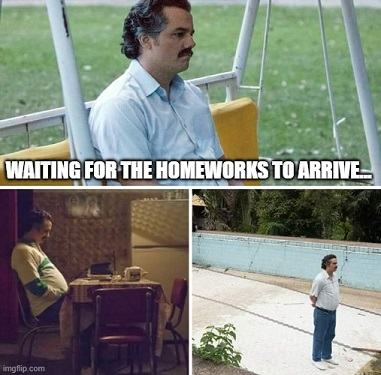